## Bakgrundsbeskrivning
Telcco AB är ett fiktivt företag som har en utmaning med kundbortfall. Man vill identifiera de kunder som riskerar att
falla bort. Dessa kunder kan genom riktade erbjudanden lockas att stanna kvar.

### Uppgiften
Hitta en lösning som bygger på observationer som intäkter från kunden, antal produkter, och andra data om kunden.
Man vill hitta kunder som riskerar att falla bort.

### Förklaring av vad för typ av AI är bäst lämpad för denna uppgift.

För denna uppgift så skall vi göra någon sorts klassificering för att utreda om kunderna har en benägenhet att lämna företaget eller inte. Det är med andra ord en maskinlärningsmetod som är inriktad mot klassificering och eftersom vi har både indata och utdata så använder vi oss av övervakat lärande (Supervised).
Några exempel är Linjär regression, Random Forest eller Neural Networks.

Övergripande länkreferens:
- [ChatGPT](https://chat.openai.com/) - Har använt mig av ChatGPT under hela processen för att lära mig de olika momenten och få bra genomgångar på de olika kod segmenten.
- [python](https://www.python.org) - pythons biblioteket
- [pandas](https://pandas.pydata.org/) - pandas biblioteket
- [NumPy](https://numpy.org/) - NumPy biblioteket
- [matplotlib](https://matplotlib.org) - matplotlib biblioteket
- [seaborn](https://seaborn.pydata.org) - seaborn biblioteket
- [stackoverflow](https://stackoverflow.com/) - För problemlösning
- [Telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) - Inspirerats av andras lösningar
- [Exploratory Data Analysis with Pandas Python 2023](https://www.youtube.com/watch?v=xi0vhXFPegw) - Inspiration och lösningar på hur jag skall ta mig an uppgiften


# Inläsning och tolkning av datan.

Börjar med att läsa in de paket som jag vet att jag kommer att använda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

Läser in vårt dataset i en dataframe och skriver ut de första raderna.

In [2]:
df = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Kontrollerar vad datan består av.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Slutsatser från datatyperna
Noterar att:
SeniorCitizen är int64. - Detta verkar skilja sig från den andra datan och värt att utforska.
TotalCharges är object. - Detta verkar inte stämma då jag tolkar detta som en summa.

Utöver detta så tycker jag inte att något direkt sticker ut med datatyperna.

Kontrollerar om vi har några saknade värden

In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Alla celler i datan har värden.

Kontrollerar om vi har några duplicerade värden

In [5]:
df.loc[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Det finns några dubbletter men det är inget som tyder på att dessa är samma kund till företaget. Dessa dubbletter skulle mycket väl kunna vara kunder som har precis samma kostnader och tjänster. Saknar data för att kunna bedöma att dessa är rena dubbletter så väljer att behålla dem som unika kunder.

# Städning och uppstyrning av datan

Eftersom 'customerID' inte bidrar till datans värde utan enbart är en unik identifierare så väljer jag att droppa denna data för att komma ifrån att modellerna som kommer användas senare lägger något värde i denna kolumn.

In [6]:
print(df['customerID'].is_unique)
df = df.drop('customerID', axis=1)
df.head(3).T

True


,0,1,2
gender,Female,Male,Male
SeniorCitizen,0,0,0
Partner,Yes,No,No
Dependents,No,No,No
tenure,1,34,2
PhoneService,No,Yes,Yes
MultipleLines,No phone service,No,No
InternetService,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes
OnlineBackup,Yes,No,Yes


Döper om kolumner för att få dem mer enhetliga.

In [7]:
df = df.rename(columns={'gender':'Gender', 'tenure':'TenureMonths'})

Kontrollerar vad för värden 'SeniorCitizen' består utav eftersom den i datan var definierad som en 'int64'.

In [8]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

'SeniorCitizen' värden verkar vara binära och tolkar därmed datan som ok.
Gör antagandet att man är 'SeniorCitizen' = 1 eller så är man inte det 'SeniorCitizen' = 0.

Eftersom 'TotalCharges' består av 6531 unika värden så är den svår att läsa av manuellt för att kunna dra någon slutsats om varför datatypen är object.

In [9]:
TotCharUniq = df['TotalCharges'].nunique()
print(f'Antal unika poster: {TotCharUniq}', end='\n\n')
print(df['TotalCharges'].head(3))

Antal unika poster: 6531

0     29.85
1    1889.5
2    108.15
Name: TotalCharges, dtype: object


Datan verkar bara innehålla numeriska värde så kontrollerar om jag kan gör om datatypen till numerisk.

In [10]:
# pd.to_numeric(df['TotalCharges'])

Cellen ovan är utkommenterad då cells resultat mynnar ut i ett fel (ValueError: Unable to parse string " "). Detta säger mig att datan inte enbart är numerisk utan innehåller " " och det krävs lite undersökning av datan.

Sorterar ut de rader som innehåller mellanslag genom att forcera datan till numerisk och ta bort värdena som innehåller andra värden än nummer och sätta dem till NULL sen filtrerar jag min ursprungliga dataframe på dessa värden.

In [11]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df[df['TenureMonths'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Det verkar vara elva poster som har mellanslag i datan. Dessa värden kan vara intressanta då de är de kunderna som inte haft en månadsbetalning ännu. Väljer att sätta dessa posters TotalCharge till 0.

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.loc[df['TotalCharges'] == 0]

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


# Datavisualisering innan redigering av unika värden

Övergripande länkreferenser:
- [Data Visualization Tutorial For Beginners | Big Data Analytics Tutorial | Simplilearn](https://www.youtube.com/watch?v=MiiANxRHSv4)

**Förbereder datan för visualisering**

In [14]:
df['Churn'] = df['Churn'].replace({'Yes': 'Churned', 'No': 'Retained'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Senior', 0: 'Not senior'})

**Visualisering**

Länkreferens:
- [Matplotlib Pie Charts](https://www.w3schools.com/python/matplotlib_pie_charts.asp)
- [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Why do many examples use `fig, ax = plt.subplots()` in Matplotlib/pyplot/python](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

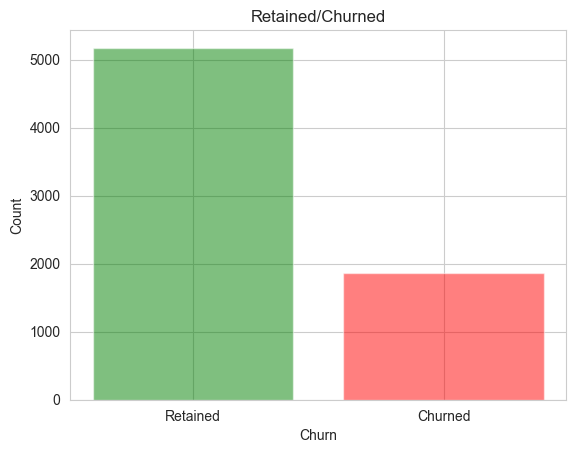

In [15]:
plt.bar(df['Churn'].value_counts().index, df['Churn'].value_counts(), color=['green', 'red'], alpha=0.5)
plt.title('Retained/Churned')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Man kan se att datan är överhängande mot de som stannar inom företaget detta gör att datan kan bli bias men i detta fallet så utgör det troligen inte något problem då 'Retained/Churned' ändå är tillräckligt balanserad. Hade detta varit ett verkligt fall så hade företaget varit i en dyster sits där de förlorat upp mot en fjärdedel av hela sin kundkrets.

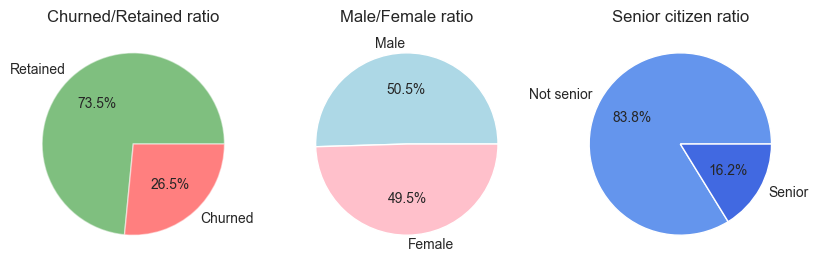

In [16]:
colors = ['green', 'red']
colors1 = ['lightblue', 'pink']
colors2 = ['cornflowerblue', 'royalblue']

gender_labels = df['Gender'].value_counts().index
churn_labels = df['Churn'].value_counts().index
senior_labels = df['SeniorCitizen'].value_counts().index

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].pie(df['Churn'].value_counts(), labels=churn_labels, autopct='%1.1f%%', colors=colors, wedgeprops={"alpha": 0.5})
ax[0].set_title('Churned/Retained ratio')

ax[1].pie(df['Gender'].value_counts(), labels=gender_labels, autopct='%1.1f%%', colors=colors1)
ax[1].set_title('Male/Female ratio')

ax[2].pie(df['SeniorCitizen'].value_counts(), labels=senior_labels, autopct='%1.1f%%', colors=colors2)
ax[2].set_title('Senior citizen ratio')

plt.show()

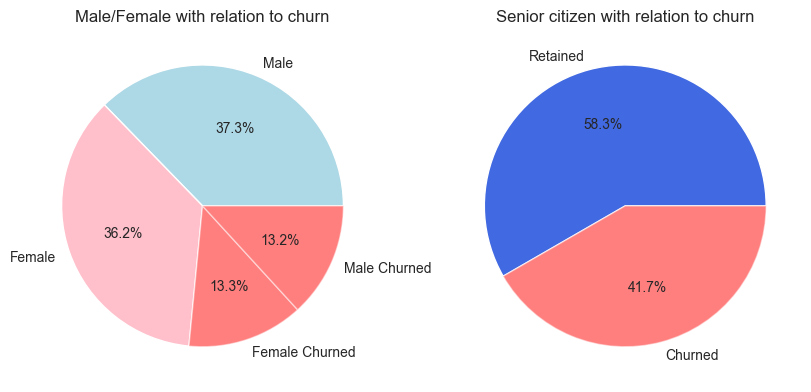

In [17]:
#gender_churn_labels = np.concatenate((gender_labels, [f'{label} Churned' for label in gender_labels]))
gender_churn_labels = ['Male', 'Female', 'Female Churned', 'Male Churned']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

pie = ax[0].pie(df[['Gender', 'Churn']].value_counts(), labels=gender_churn_labels, autopct='%1.1f%%', colors=['lightblue', 'pink', 'red' ,'red'])
ax[0].set_title('Male/Female with relation to churn')
pie[0][2].set(alpha=0.5)
pie[0][3].set(alpha=0.5)

pie = ax[1].pie(df[df['SeniorCitizen'] == 'Senior']['Churn'].value_counts(), labels=churn_labels, autopct='%1.1f%%', colors=['royalblue','red'])
ax[1].set_title('Senior citizen with relation to churn')
pie[0][1].set(alpha=0.5)

plt.show()

Fördelningen mellan män och kvinnor som hoppar av är jämnt fördelad.

Det är intressant att på den visserligen ganska lilla gruppen Seniorer så är det ändå en stor andel som hoppar av.

För att visualisera eventuella samband mellan vilket kontrakt man har så skapar jag ett histogram som visar de olika kontrakttyperna och hur många som har Churn eller Retain.

Länkreferens:
- [How to make a Histogram plot in Python using Matplotlib | Ft.](https://www.youtube.com/watch?v=yKPMetjQqsk)


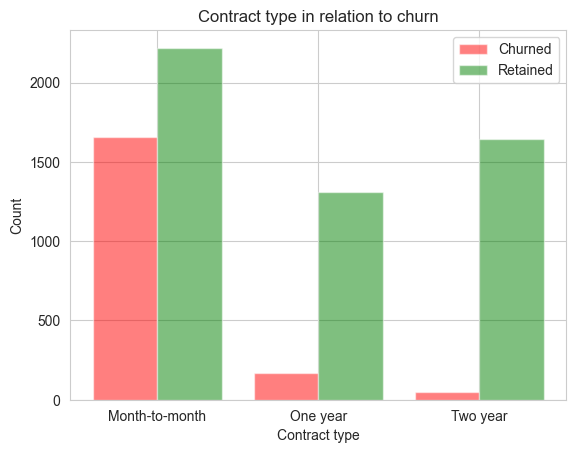

In [19]:
fig, ax = plt.subplots()

contracts = sorted(df['Contract'].unique())
churned = df['Churn'] == 'Churned'
retained = df['Churn'] == 'Retained'

bins = np.arange(0, len(contracts) + 1)
width = 0.4

for i, contract in enumerate(contracts):
    ax.bar(bins[i] - width/2, churned[df['Contract'] == contract].sum(), width=width, color='red', alpha=0.5)
    ax.bar(bins[i] + width/2, retained[df['Contract'] == contract].sum(), width=width, color='green', alpha=0.5)

ax.set_xticks([0, 1, 2])
ax.set_title('Contract type in relation to churn')
ax.set_xticklabels(['Month-to-month', 'One year', 'Two year'])
ax.set_xlabel('Contract type')
ax.set_ylabel('Count')
ax.legend(['Churned', 'Retained'])

plt.show()

De kunder som har månad till månad betalning har en större benägenhet att hoppa av än de som har längre kontrakts tider.

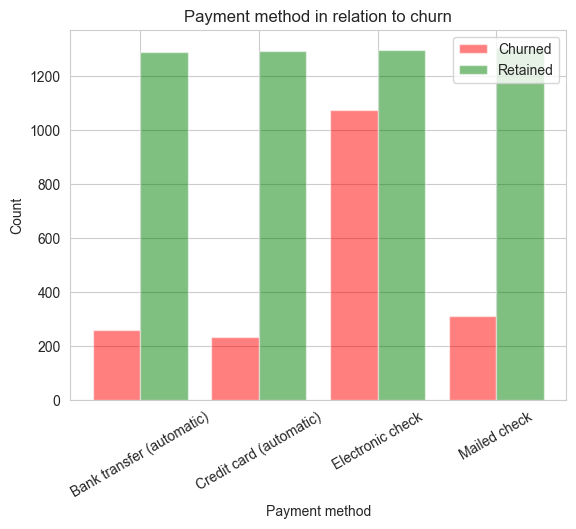

In [21]:
fig, ax = plt.subplots()

payment_methods = sorted(df['PaymentMethod'].unique())
churned = df['Churn'] == 'Churned'
retained = df['Churn'] == 'Retained'

bins = np.arange(0, len(payment_methods) + 1)
width = 0.4

for i, payment_method in enumerate(payment_methods):
    ax.bar(bins[i] - width/2, churned[df['PaymentMethod'] == payment_method].sum(), width=width, color='red', alpha=0.5)
    ax.bar(bins[i] + width/2, retained[df['PaymentMethod'] == payment_method].sum(), width=width, color='green', alpha=0.5)

ax.set_xticks([0, 1, 2, 3])
ax.set_title('Payment method in relation to churn')
ax.set_xticklabels(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])
for label in ax.get_xticklabels():
    label.set(rotation=30, horizontalalignment='center')
ax.set_xlabel('Payment method')
ax.set_ylabel('Count')
ax.legend(['Churned', 'Retained'])

plt.show()

De flesta kunder som valde att lämna hade sin betalning via 'Electronic check'.

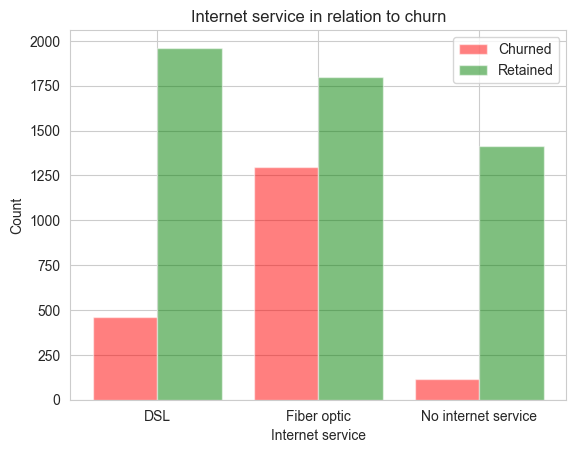

In [23]:
fig, ax = plt.subplots()

# Jag borde göra en funktion av detta men det går helt enkelt snabbare att klippa och klistra.

internet_services = sorted(df['InternetService'].unique())
churned = df['Churn'] == 'Churned'
retained = df['Churn'] == 'Retained'

bins = np.arange(0, len(payment_methods) + 1)
width = 0.4

for i,internet_service in enumerate(internet_services):
    ax.bar(bins[i] - width/2, churned[df['InternetService'] == internet_service].sum(), width=width, color='red', alpha=0.5)
    ax.bar(bins[i] + width/2, retained[df['InternetService'] == internet_service].sum(), width=width, color='green', alpha=0.5)

ax.set_xticks([0, 1, 2])
ax.set_title('Internet service in relation to churn')
ax.set_xticklabels(['DSL', 'Fiber optic', 'No internet service'])
ax.set_xlabel('Internet service')
ax.set_ylabel('Count')
ax.legend(['Churned', 'Retained'])

plt.show()

Man kan se att en övervägande andel av de som har en fiberanslutning har en tendens att säga upp sina tjänster.

Hittade ett annat sätt att bättre visa datan med seaborn.

Länkreferens:
- [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

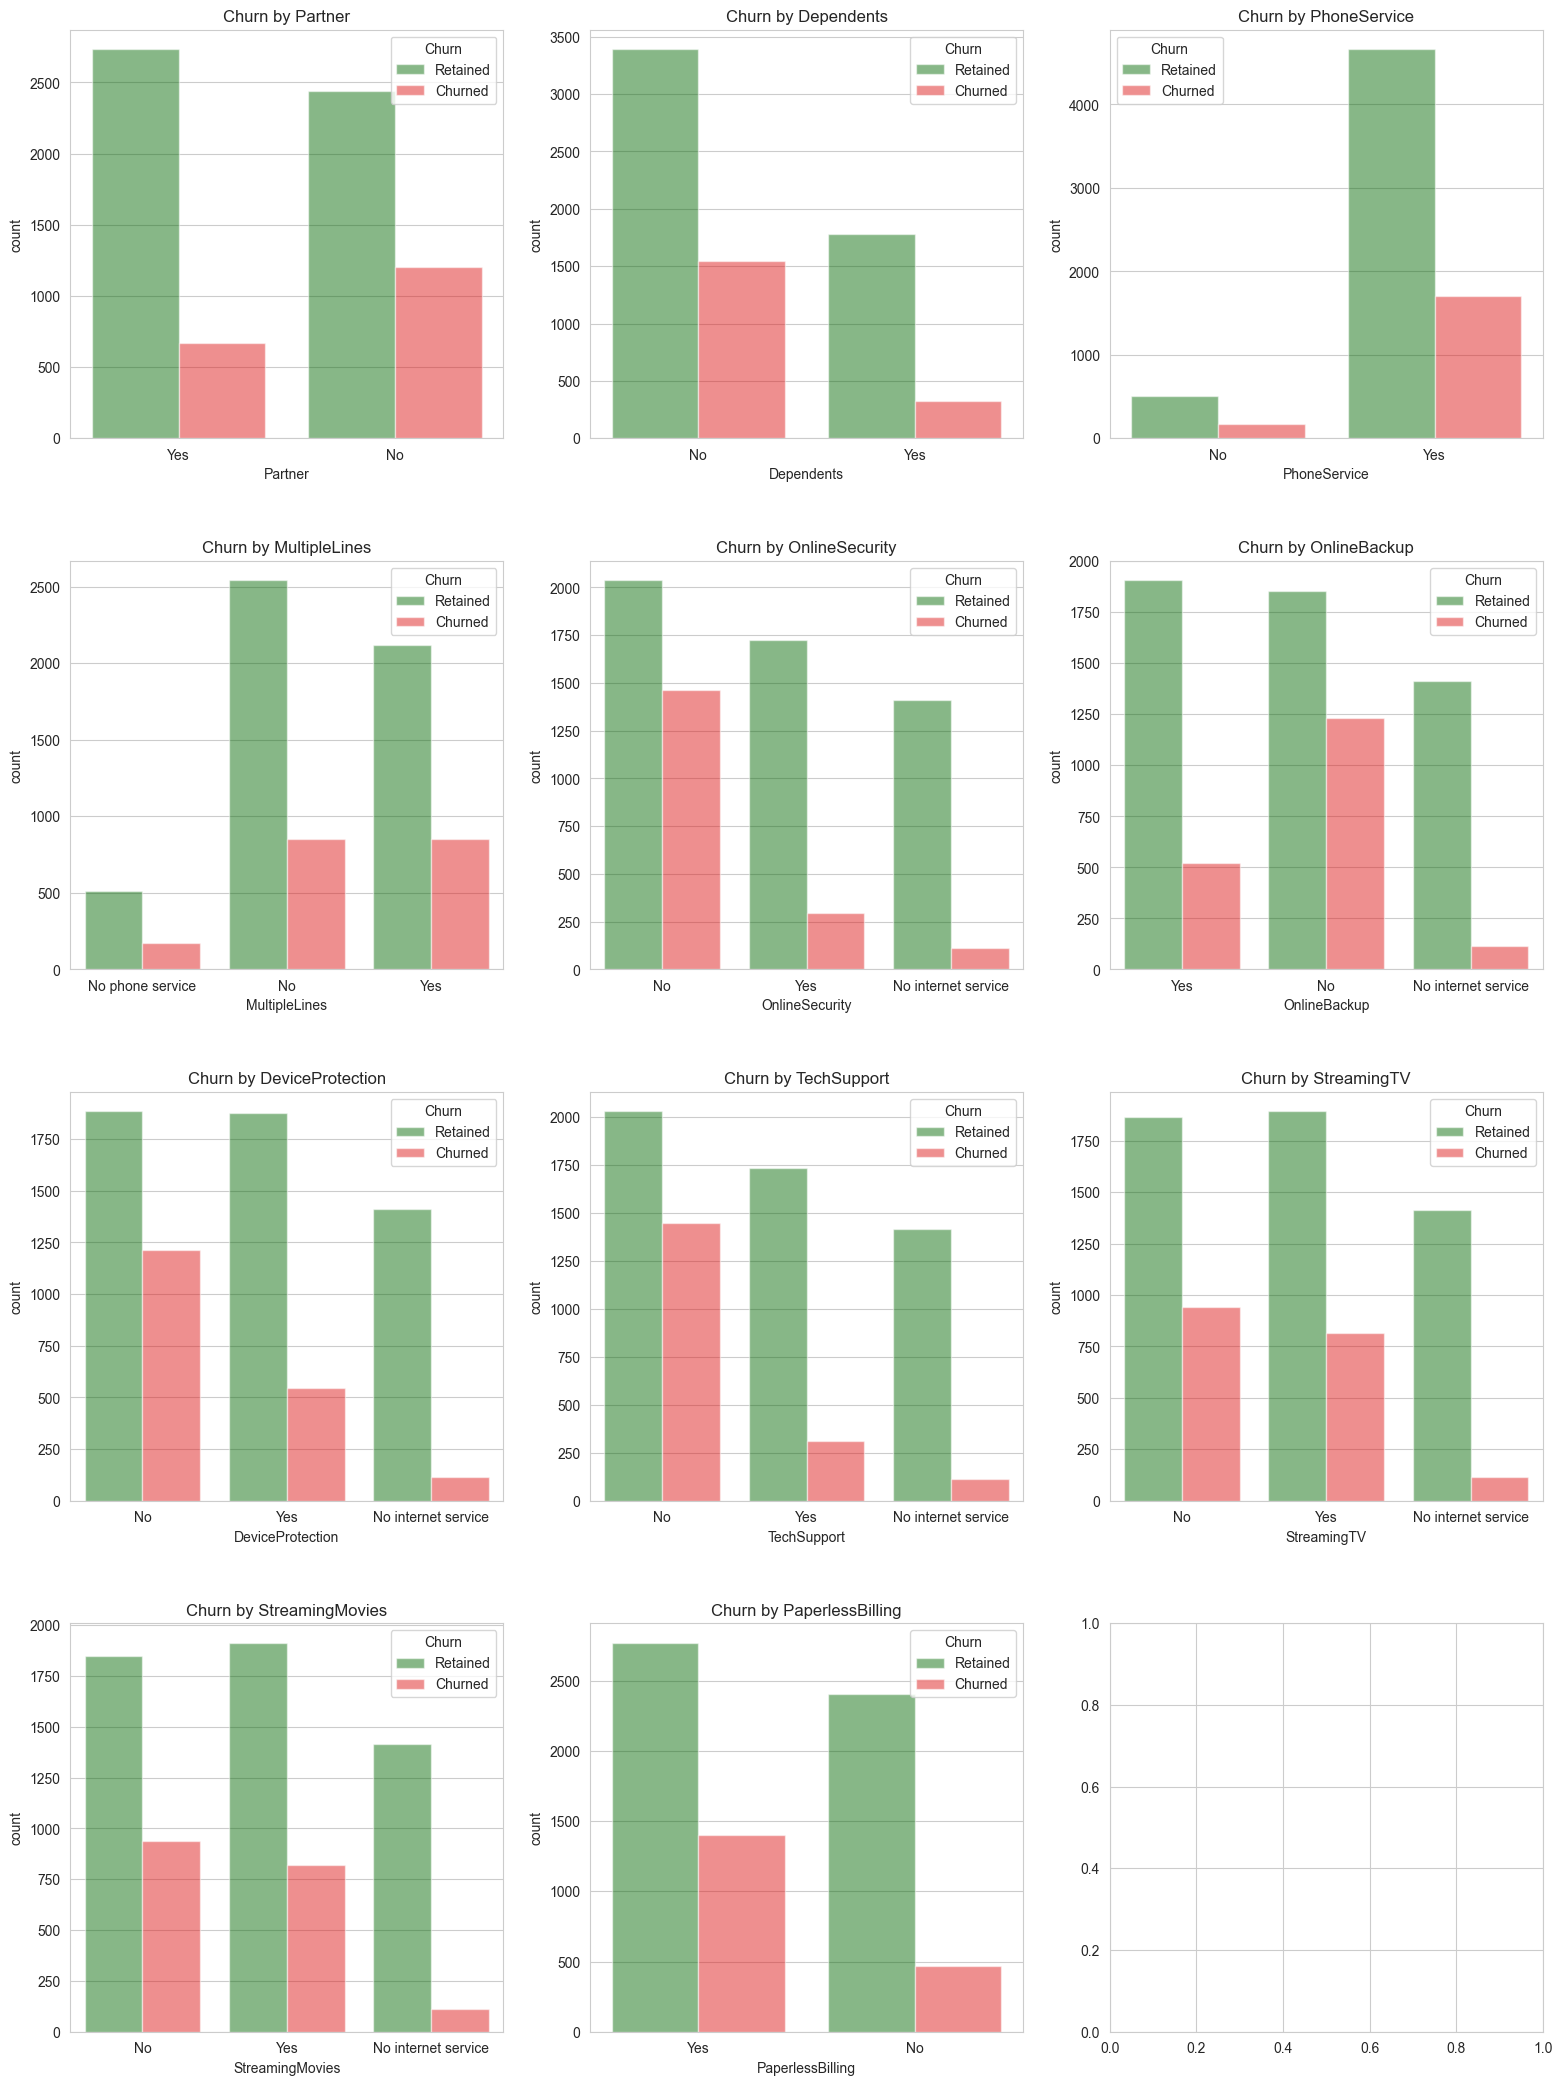

In [25]:
service_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

fig, ax = plt.subplots(4, 3, figsize=(19,26))
plt.subplots_adjust(hspace=0.3)
for i, service in enumerate(service_col):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=service, hue='Churn', data=df, palette=['green','red'], alpha=0.5)
    plt.xlabel(service)
    plt.title('Churn by '+service)

plt.show()

De grafer som sticker ut mest är 'Churn by TechSupport' och 'Churn by OnlineSecurity' där de som ej har dessa tjänster har en större benägenhet att hoppa av.

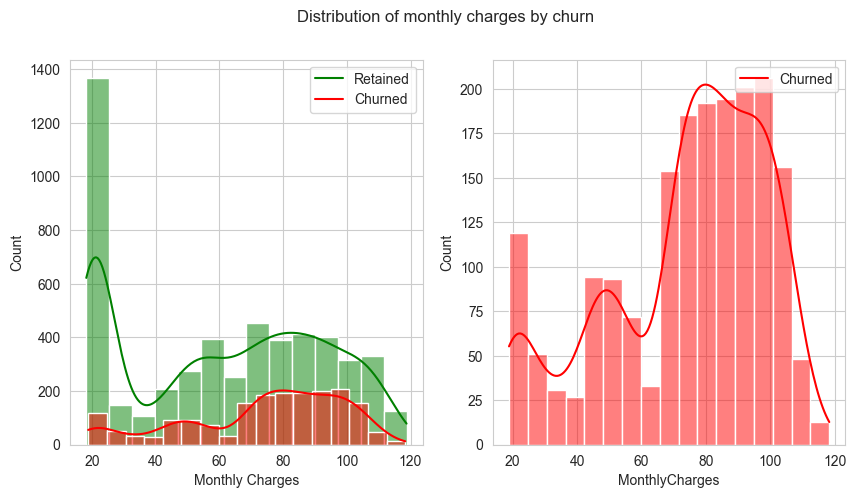

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribution of monthly charges by churn')
sns.set_context()
sns.histplot(df.MonthlyCharges[(df['Churn'] == 'Retained') ], color="green", fill = True, bins='auto', kde=True, ax=ax[0])
sns.histplot(df.MonthlyCharges[(df["Churn"] == 'Churned') ], color="red", fill= True, bins='auto', kde=True, ax=ax[0])
ax[0].legend(['Retained','Churned'],loc='upper right')

ax[0].set_ylabel('Count')
ax[0].set_xlabel('Monthly Charges')

sns.histplot(df.MonthlyCharges[(df["Churn"] == 'Churned') ], color="red", fill= True, bins='auto', kde=True, ax=ax[1])
ax[1].legend(['Churned'],loc='upper right')
plt.show()

Relationen visar att om man har en högre månadskostnad så är man mer benägen att lämna.

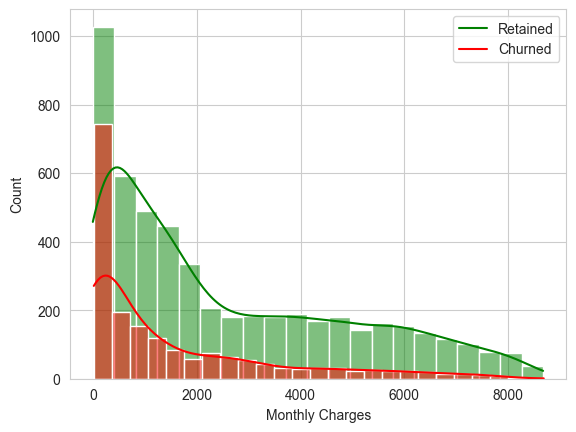

In [27]:
fig.suptitle('Distribution of total charges by churn')
sns.set_context()
ax = sns.histplot(df.TotalCharges[(df['Churn'] == 'Retained') ], color="green", fill = True, bins='auto', kde=True)
ax = sns.histplot(df.TotalCharges[(df["Churn"] == 'Churned') ], color="red", fill= True, bins='auto', kde=True)
ax.legend(['Retained','Churned'],loc='upper right')

ax.set_ylabel('Count')
ax.set_xlabel('Monthly Charges')

plt.show()

De flesta som lämnar, lämnar innan de har hunnit betala många månader. Det är med andra ord få stammisar som lämnar. Detta borde bekräftas om vi kollar på 'TenureMonths'

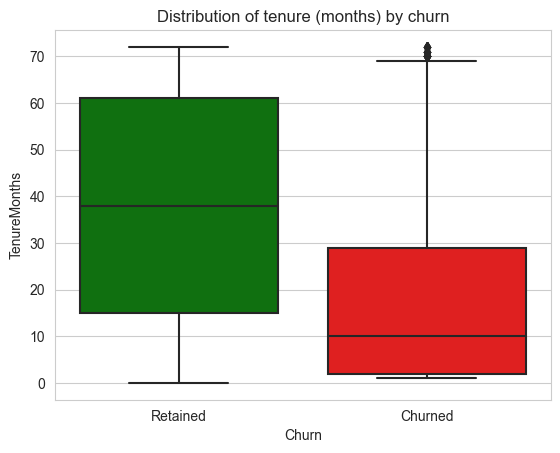

In [28]:
fig, ax = plt.subplots(1, 1)
ax = sns.boxplot(df, x='Churn', y = 'TenureMonths', palette=['green', 'red'])
ax.set_title('Distribution of tenure (months) by churn')
plt.show()

Som vi kan se så bekräftar vår tenure vårt tidigare påstående.

# Korrelationskarta
För att bedöma hur värdena hänger ihop så skapar jag en korrelationskarta.

Notera: Eftersom datan inte är transformerad på något vis så är det en liten risk att använda funktionen 'pd.factorize()' nedan då denna funktion gör om alla värden till numeriska men den tar inte hänsyn till viktning.

Länkreferenser:
- [pandas.factorize on an entire data frame](https://stackoverflow.com/questions/39390160/pandas-factorize-on-an-entire-data-frame)

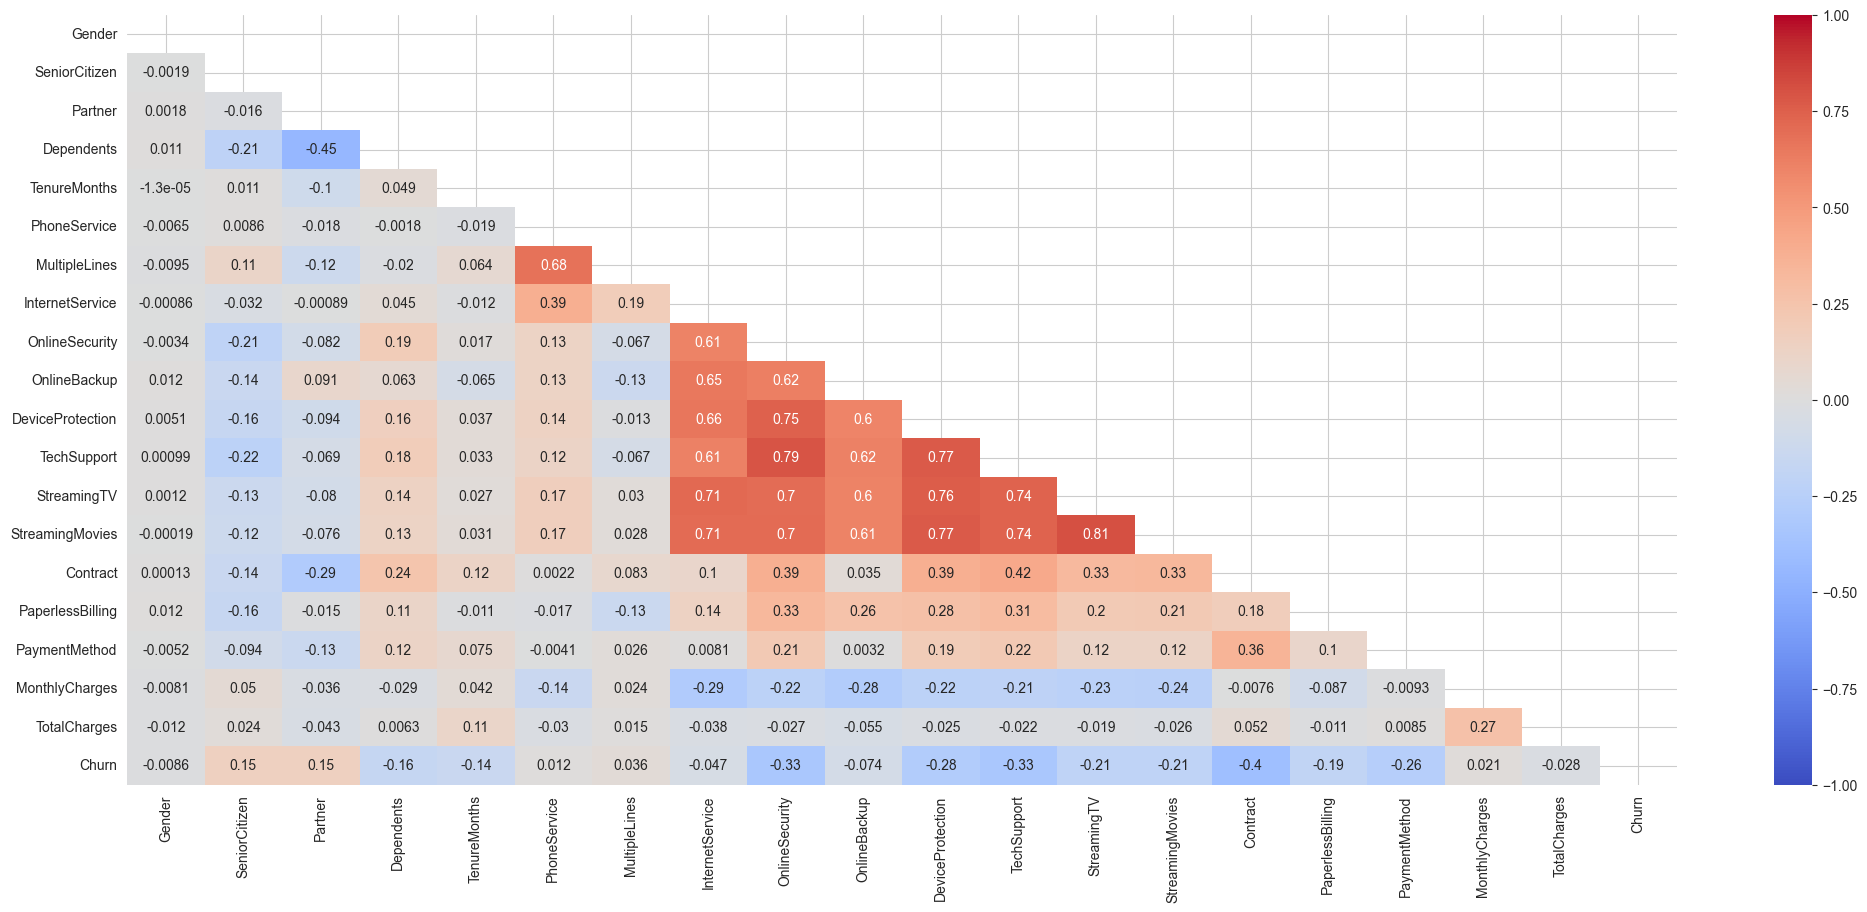

In [29]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

**Korrelation mellan Churn och alla unika poster**
Skapade en kopia av min DF för att kunna skapa dummy data av den. Dummydatan gör om alla cellerna till 1 och 0 samt skapar nya rubriker med alla unika värden.
Gör om min Churn att pendla mellan 1 och 0 i samma kolumn så att jag kan sortera på den. Får på detta sätt ut vilken data som påverkar min Churn mest.
Detta bekräftar på nytt många av mina antaganden ovan.

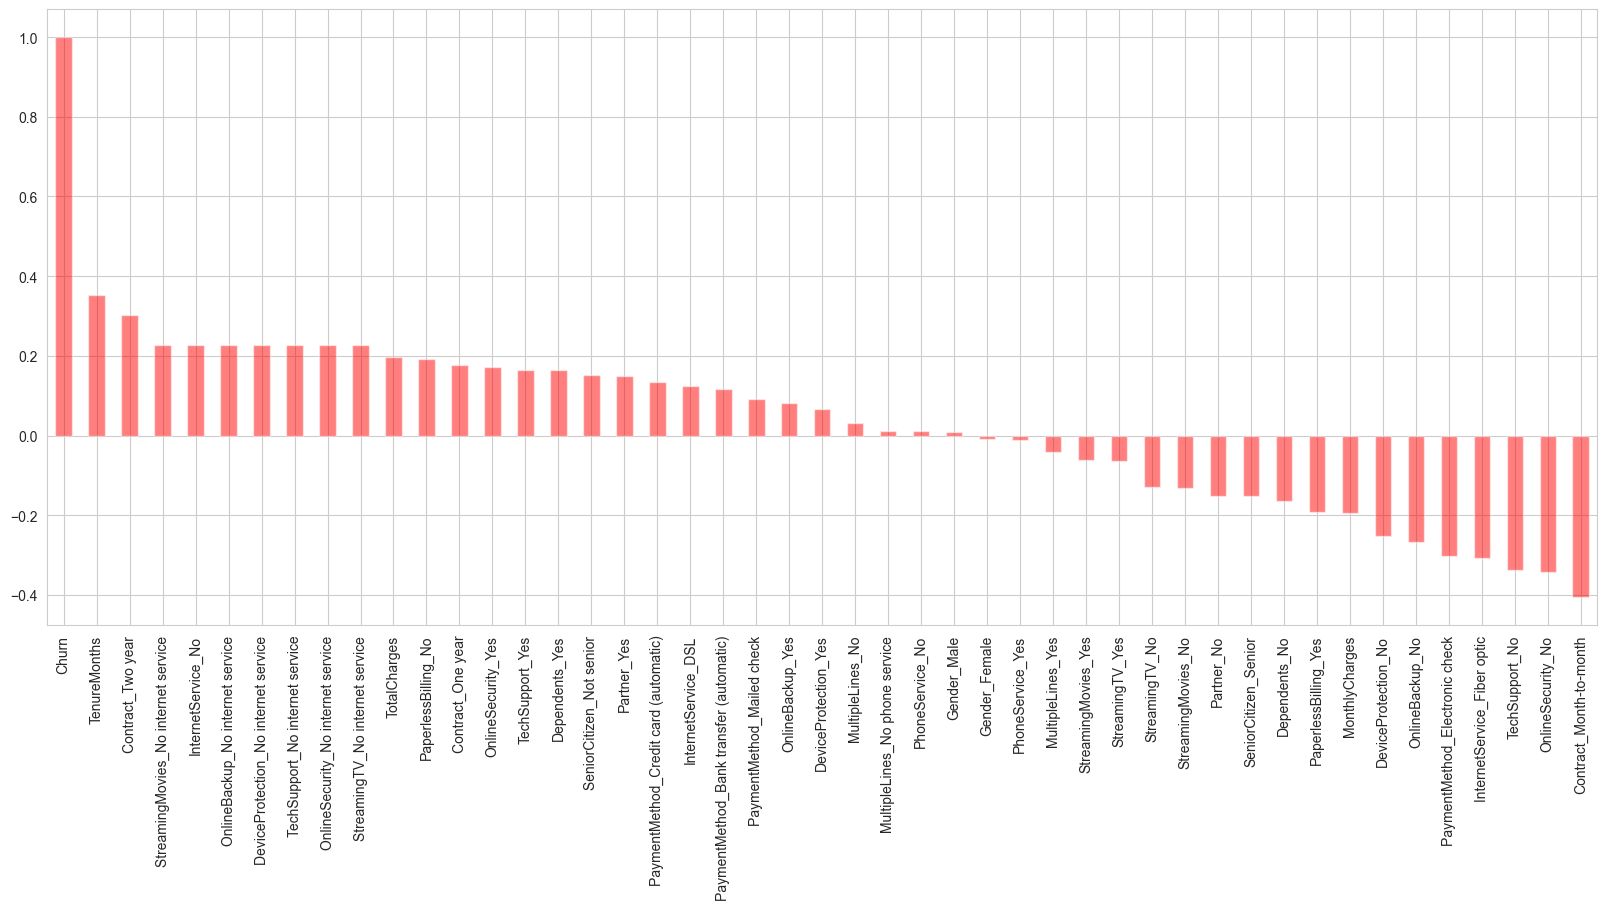

In [30]:
dummy_df = df.copy()
dummy_df['Churn'] = dummy_df['Churn'].apply(lambda x: 1 if x=='Retained' else 0)
dummy_df = pd.get_dummies(dummy_df)
plt.figure(figsize=(20,8))
dummy_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.5)
plt.show()

# Datapreprocessing

Övergripande länkreferenser:
- [In supervised learning, why is it bad to have correlated features?](https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features)

### Redigering av unika värden

Börjar med att skapa en ny dataframe innan jag redigerar min data och kollar sen antalen unika värden i varje kolumn.

In [31]:
dfml = df.copy()
dfml.nunique()

Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
TenureMonths          73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [32]:
# Skapar en lista för att analysera kolumnerna som har två värden för att se om jag kan ersätta dem med binära tal.
col=['Gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for i in col:
    print(i,dfml[i].unique())

Gender ['Female' 'Male']
SeniorCitizen ['Not senior' 'Senior']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['Retained' 'Churned']


In [33]:
# Granska kolumnerna som har tre värden för att se om jag kan göra om dessa till binära.
col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
for i in col:
    print(i,dfml[i].unique())

MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']


Tänker att jag borde kunna ändra alla värden som har 'No internet service' och 'No phone service' till 'No' då jag reda får denna infon genom 'InternetService' och 'PhoneService' kolumnerna.

In [34]:
dfml = dfml.replace(['No phone service'], 'No')
dfml = dfml.replace(['No internet service'], 'No')

col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
for i in col:
    print(i,dfml[i].unique())

MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']


Skapar en variabel med de kolumner som kan göras om till binära tal.

In [35]:
dfml['SeniorCitizen'] = dfml['SeniorCitizen'].replace(['Not senior', 'Senior'],['No', 'Yes'])
dfml['Churn'] = dfml['Churn'].replace(['Retained', 'Churned'],['No', 'Yes'])
str_binary_col=['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in str_binary_col:
    print(i,dfml[i].unique())

SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']
MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']


In [36]:
#Sparar en Dataframe med mina strängvärden ifall jag skulle behöva dem senare.
dfml_str = dfml.copy

### Data encoding
Gör om min data till numeriska värden som kan läsas in i mina modeller.

In [37]:
dfml = dfml.replace(['Yes','No'],[1,0])
dfml.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [38]:
dfml = dfml.replace(['Female','Male'],[0,1])
dfml.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [39]:
dfml['InternetService'] = dfml['InternetService'].replace([0],['No'])
cols_to_ohe = ['InternetService', 'PaymentMethod']
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(dfml[cols_to_ohe])
onehot_cols = ohe.transform(dfml[cols_to_ohe])
dfohe = pd.DataFrame(onehot_cols, columns=ohe.get_feature_names_out(cols_to_ohe))
dfml = pd.concat([dfml, dfohe], axis=1)

dfml = dfml.drop(cols_to_ohe, axis=1)


Väljer att avkoda mina 'Contract' med OrdinalEncoder då vi kunde se att tidigare att månad till månad hade högre churn så tänker jag att det kan vara viktigt att vikta dessa värden.

In [40]:
oe = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
oe.fit(dfml[['Contract']])
oe_cols = oe.transform(dfml[['Contract']])
dfoe = pd.DataFrame(oe_cols, columns=['Contract_nr'])
dfml = pd.concat([dfml, dfoe], axis=1)

dfml = dfml.drop('Contract', axis=1)

In [41]:
dfml.head(30)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_nr
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,1889.50,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,0,0,0,2,1,0,1,1,0,...,108.15,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,0,45,0,0,1,0,1,...,1840.75,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,0,0,0,8,1,1,0,0,1,...,820.50,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0,0,1,22,1,1,0,1,0,...,1949.40,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0,0,0,0,10,0,0,1,0,0,...,301.90,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0,0,1,0,28,1,1,0,0,1,...,3046.05,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,0,0,1,62,1,0,1,1,0,...,3487.95,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Skalning av den numeriska datan.

Använder mig av StandardScaler för de värden som är pengar då dessa värden har ett samband som gör att jag vill kunna gämnföra dem. Med StandardScaler så sätts medelvärdet till 0 och med en standard avvikelse på 1.

In [42]:
money_cols = ['MonthlyCharges', 'TotalCharges']
dfml[money_cols] = pd.DataFrame(StandardScaler().fit_transform(dfml[money_cols ].astype('float64')), columns=money_cols )

In [43]:
dfml.head(30)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_nr
0,0,0,1,0,1,0,0,0,1,0,...,-0.992611,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,-0.172165,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,0,0,0,2,1,0,1,1,0,...,-0.958066,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,0,45,0,0,1,0,1,...,-0.193672,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0,0,0,2,1,0,0,0,0,...,-0.938874,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,0,0,0,8,1,1,0,0,1,...,-0.643789,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0,0,1,22,1,1,0,1,0,...,-0.145738,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0,0,0,0,10,0,0,1,0,0,...,-0.872587,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0,0,1,0,28,1,1,0,0,1,...,0.338085,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,0,0,1,62,1,0,1,1,0,...,0.533044,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


För 'TenureMonths' använder jag mig av MinMaxScaling då jag vill få dem till ett värde mellan 0 och 1 för att högre värde är positivt enligt analysen ovan.

In [44]:
dfml['TenureMonths'] = pd.DataFrame(MinMaxScaler().fit_transform(dfml[['TenureMonths']].astype('float64')), columns=['TenureMonths'])

In [45]:
dfml.head(30)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_nr
0,0,0,1,0,0.013889,0,0,0,1,0,...,-0.992611,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,0.472222,1,0,1,0,1,...,-0.172165,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,0,0,0,0.027778,1,0,1,1,0,...,-0.958066,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,0,0.625000,0,0,1,0,1,...,-0.193672,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0.027778,1,0,0,0,0,...,-0.938874,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,0,0,0,0.111111,1,1,0,0,1,...,-0.643789,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0,0,1,0.305556,1,1,0,1,0,...,-0.145738,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0,0,0,0,0.138889,0,0,1,0,0,...,-0.872587,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0,0,1,0,0.388889,1,1,0,0,1,...,0.338085,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1,0,0,1,0.861111,1,0,1,1,0,...,0.533044,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Uppdelning av data

Delar upp min data i X och y variabler. Eftersom vi är intresserade av Churn får den kolumnen agera min y variabel. Eftersom det är ett kategoriskt problem som vi vill lösa så väljer jag att använda mig av stratify som balanserar värdena mellan test och träning så de representerar vårt dataset detta kan även hjälpa till då vårat datasett är något obalanserat.

In [46]:
X = dfml.drop(columns="Churn")
y = dfml["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Maskininlärning

Jag väljer att fokuser mina tester till dessa fyra modeller då de är bra på kategoriska problem.
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Support Vector Machines

Övergripande referenslänkar:
[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

## Modell 1 - Logistic Regression

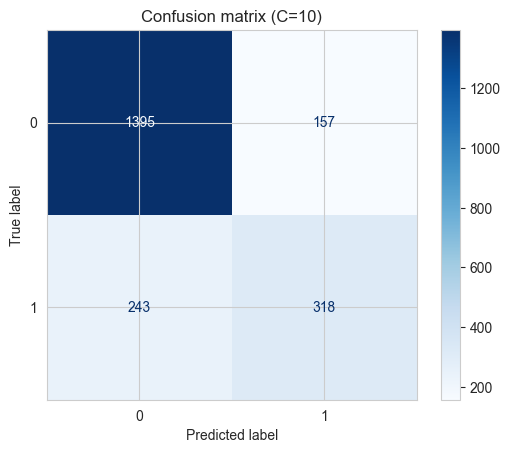

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.57      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



In [47]:
logreg = LogisticRegression(max_iter=10000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

C = grid_search.best_params_['C']

logreg = LogisticRegression(C=C)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='g')
plt.title(f'Confusion matrix (C={C})')
plt.show()

print(classification_report(y_test, y_pred))

In [48]:
results = []
models = []
models.append("Logistic Regression")
results.append(accuracy_score(y_test, y_pred))

Itererar igenom några C för att hitta det optimala värdet bland de värden jag valt. C blir satt till 10. Jag valde använda mig av standard solver 'lbfgs' och standard penalty 'l2' och experimentera med C värdet tills jag fick ett tillräckligt bra resultat.
Modellen visar på en noggrannhet av 81% vilket innebär att den gjorde rätt antagande i 81% av alla fallen jämfört mot testdatan.

## Modell 2 - K-Nearest Neighbors

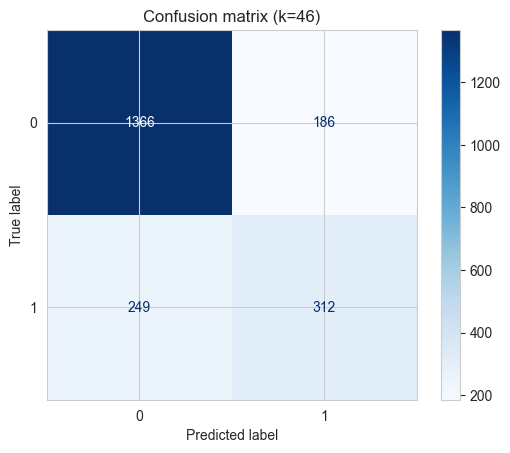

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.63      0.56      0.59       561

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113



In [49]:
k_range = range(1, 60)
param_grid = {'n_neighbors': k_range}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

k = grid.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='g')
plt.title(f'Confusion matrix (k={k})')
plt.show()

print(classification_report(y_test,y_pred))

In [50]:
models.append("K-Nearest Neighbors")
results.append(accuracy_score(y_test, y_pred))

Även för denna modell itererar jag över i detta fallet vårt k värde. Jag misstänker dock att detta eventuellt kan leda till att jag sabbar modellen. Man kan tolka värdena med t.ex. 'validation set' eller 'cross-validation' för att se att värdena fortfarande är ok. Väljer att inte göra detta utan fortsätter med värdet som det är.

## Modell 3 - Decision Tree

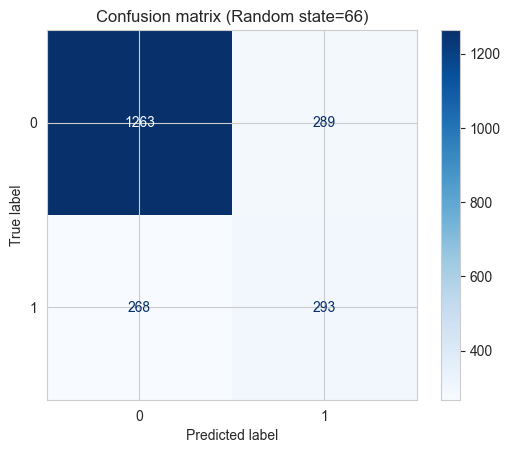

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1552
           1       0.50      0.52      0.51       561

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113





In [51]:
accuracy_scores = []

for rnd in range(1, 101):
    clf = DecisionTreeClassifier(random_state=rnd)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

best_rnd = accuracy_scores.index(max(accuracy_scores)) + 1

clf = DecisionTreeClassifier(random_state=best_rnd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='g')
plt.title(f'Confusion matrix (Random state={best_rnd})')
plt.show()
print(classification_report(y_test,y_pred), end='\n\n\n')

# Koden nedan sparar trädet som en .pdf och skriver ut det. Varning! Detta tar tid.
#plt.figure(figsize=(15, 10))
#plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'])
#plt.savefig('decision_tree.pdf', format='pdf', bbox_inches='tight')

In [52]:
models.append("Decision Tree")
results.append(accuracy_score(y_test, y_pred))

Även här itererade jag igenom, i detta fallet random state (66) för att få det bästa accuracy resultatet som denna model kunde ge mig. Valde att inte utforska så mycket då resultaten jag fick inte var något vidare för mitt dataset.

## Modell 4 - Support Vector Machines

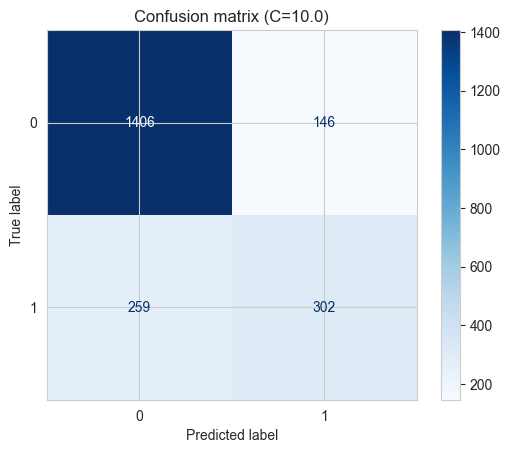

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.54      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [53]:
C_values = np.logspace(-3, 3, num=7)
best_score = 0
best_C = 0

for C in C_values:
    svm = SVC(kernel="linear", C=C, gamma="auto")
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    score = svm.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_C = C

svm = SVC(kernel='linear', C=best_C, gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues', values_format='g')
plt.title(f'Confusion matrix (C={best_C})')
plt.show()

print(classification_report(y_test, y_pred))

In [54]:
models.append("Support Vector Machines")
results.append(accuracy_score(y_test, y_pred))

Testade både 'linear' och 'rbf' kernel. Fick bäst resultat med kernel när jag itererade igenom C som sattes till 10 även för SVM. Det finns likheter mellan SVM 'linear' och Logistic Regression då båda försöker hitta linjära samband.

# Resultat och slutsatser

Rapporterna under varje modell visar hur de har presterat i att förutsäga en kategori för varje instans av testdatan.

'Precision' mäter andelen av de förutsagda positiva fallen som faktiskt är positiva (true positives) och är högre när modellen gör färre felaktiga förutsägelser om positiva fall.
'Recall' mäter andelen av de faktiska positiva fallen som korrekt identifierades av modellen och är högre när modellen identifierar fler faktiska positiva fall.
'F1-score' är ett viktat medelvärde av 'precision' och 'recall' och ger en mer balanserad syn på modellens prestanda.

Utöver dessa mätvärden innehåller rapporten också en 'support' kolumn som visar antalet instanser av varje klass i testdatan och ger en överblick över balansen mellan klasserna.
Noggrannheten 'accuracy' av modellen ges också för att visa hur väl modellen presterade över alla instanser i testdatan.
'Macro avg' och 'weighted avg' ger genomsnittliga mätvärden över båda klasserna, viktade antingen av antalet instanser av varje klass (weighted avg) eller utan viktning (macro avg).

Av de modeller jag valde att testa så fick jag den bästa noggrannheten av, Logistic Regression.
Denna modell får troligen bäst resultat för att den är väldigt väl lämpad till att bedöma binära sammanhang med ett binärt svar så som 'Churn' eller 'Retained'. Tror även att denna presterade bra då sambanden är relativt linjära över vilka som lämnar företaget eller ej.

In [55]:
total_results = pd.DataFrame({'Model': models, 'Accuracy Score': results})
print(total_results.sort_values('Accuracy Score',ascending = False))

                     Model  Accuracy Score
0      Logistic Regression        0.810696
3  Support Vector Machines        0.808329
1      K-Nearest Neighbors        0.794132
2            Decision Tree        0.736394
